In [132]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
%matplotlib inline

604


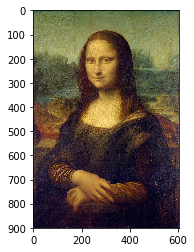

In [147]:
from skimage.color import rgb2gray

img = misc.imread('monalisa.jpg')
plt.imshow(img)

x = len(img[0])
y = len(img)
pixel_num = x * y

(900, 604)

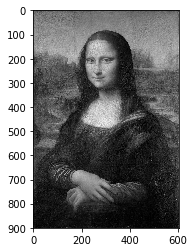

In [134]:
img_gray = rgb2gray(img)

plt.imshow(rgb2gray(img), cmap = 'gray')

img_gray.shape

In [135]:
def sample_pixels(x, y):

    random_pixels = []

    while len(random_pixels) < 5000:
        x_random = np.random.randint(0, x)
        y_random = np.random.randint(0, y)

        temp = [x_random, y_random]

        if temp not in random_pixels:
            random_pixels.append(temp)
    
    return random_pixels

In [136]:
from sklearn.preprocessing import normalize

def preprocess_image(img):
    img = normalize(img)
    return img

In [137]:
#prp_image = preprocess_image(img)
# Gives dimension error

In [138]:
X = sample_pixels(x, y)

In [139]:
def return_value(pixel, img):
    
    x_coordinate = pixel[0]
    y_coordinate = pixel[1]
    
    return img[y_coordinate][x_coordinate]

In [140]:
def create_y(samples, img):
    y = []
    for pixel in samples:
        rgb = return_value(pixel, img)
        y.append(rgb)
    
    return y

In [141]:
Y = create_y(X, img_gray)

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [144]:
## Too much runtime

def approximate_image(regr, x, y):
    app_image = []
    
    for i in range(y): ## supposed to be y
        line = []
        for j in range(x): ## supposed to be x
            line.append(regr.predict([[j,i]]))
        app_image.append(line)
        
    return app_image

In [145]:
def get_empty_x():
    
    X = []

    for i in range(y):
        line = []
        for j in range(x):
            line.append([j,i])
        X.append(line)
    
    return X

X_out = np.array(get_empty_x())

In [149]:
final_image = []

for i in range(len(X_out)):
    temp = regr.predict(X_out[i])
    temp = temp.reshape(1, x)
    final_image.append(temp)

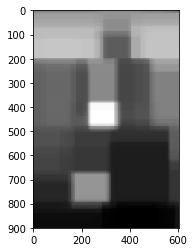

In [150]:
plt.imshow(np.array(final_image).reshape((y, x)), cmap = 'gray')